- Exercici 1
Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.


In [31]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#premier_df = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\premier_league.csv', sep=',')
premier_df = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\premier_league.csv', sep=',')
premier_df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [3]:
premier_df[premier_df['Losses'] != 0].Losses.count() / len(premier_df) * 100

80.73555166374781

In [4]:
premier_df[premier_df['Losses'] == 0].Losses.count() / len(premier_df) * 100

19.264448336252187

In [5]:
premier_df.shape

(571, 59)

In [6]:
premier_df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [7]:
premier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [8]:
premier_df.isna().sum() / len(premier_df) * 100

Name                       0.000000
Jersey Number              1.401051
Club                       0.000000
Position                   0.000000
Nationality                0.175131
Age                        0.175131
Appearances                0.000000
Wins                       0.000000
Losses                     0.000000
Goals                      0.000000
Goals per match           45.884413
Headed goals              12.084063
Goals with right foot     12.084063
Goals with left foot      12.084063
Penalties scored          45.884413
Freekicks scored          45.884413
Shots                     45.884413
Shots on target           45.884413
Shooting accuracy %       45.884413
Hit woodwork              12.084063
Big chances missed        45.884413
Clean sheets              54.115587
Goals conceded            54.115587
Tackles                   12.084063
Tackle success %          31.698774
Last man tackles          66.199650
Blocked shots             12.084063
Interceptions             12

Mostra aleatòria simple del 20%:

In [9]:
premier_df.sample(frac=0.2)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
238,Charlie Cresswell,35.0,Leeds-United,Defender,England,17.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
90,Viktor Gyökeres,42.0,Brighton-and-Hove-Albion,Forward,Sweden,22.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
194,Sandro Ramírez,28.0,Everton,Forward,Spain,25.0,8,2,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1.0
499,Conor Townsend,14.0,West-Bromwich-Albion,Defender,England,27.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
480,Dele Alli,20.0,Tottenham-Hotspur,Midfielder,England,24.0,157,90,34,50,...,NaN,NaN,NaN,NaN,NaN,NaN,24,0,178,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Konstantinos Tsimikas,21.0,Liverpool,Defender,Greece,24.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
530,Arthur Masuaku,26.0,West-Ham-United,Defender,The Democratic Republic Of Congo,26.0,81,26,33,0,...,NaN,NaN,NaN,NaN,NaN,NaN,12,1,72,2.0
494,Jonathan Bond,23.0,West-Bromwich-Albion,Goalkeeper,England,27.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
206,Alphonse Areola,1.0,Fulham,Goalkeeper,France,27.0,1,0,1,0,...,2.0,0.0,0.0,0.0,8.0,3.0,0,0,0,NaN


Mostra sistemàtica de aprox. el 20% (no es exacte degut a que és necessari arrodonir l'interval):

In [10]:
size_sample = round(len(premier_df) * 0.2)
print(size_sample)

starting_point = random.randint(0, len(premier_df)-size_sample)
print(starting_point)

interval = round(len(premier_df[starting_point:]) / size_sample)
print(interval)

premier_df[starting_point::interval]

114
83
4


,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
83,Peter Gwargis,55.0,Brighton-and-Hove-Albion,Midfielder,Sweden,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
87,José Izquierdo,19.0,Brighton-and-Hove-Albion,Forward,Colombia,28.0,47,13,19,5,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,26,18.0
91,Nick Pope,1.0,Burnley,Goalkeeper,England,28.0,74,28,26,0,...,29.0,100.0,18.0,45.0,300.0,605.0,4,0,1,NaN
95,Charlie Taylor,3.0,Burnley,Defender,England,27.0,74,23,33,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,39,3.0
99,Phil Bardsley,26.0,Burnley,Defender,Scotland,35.0,300,100,130,7,...,NaN,NaN,NaN,NaN,NaN,NaN,78,2,327,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Willy Boly,15.0,Wolverhampton-Wanderers,Defender,France,29.0,60,24,18,4,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2,55,4.0
555,Maximilian Kilman,49.0,Wolverhampton-Wanderers,Defender,England,23.0,4,2,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0.0
559,Rúben Neves,8.0,Wolverhampton-Wanderers,Midfielder,Portugal,23.0,75,30,23,6,...,NaN,NaN,NaN,NaN,NaN,NaN,17,0,66,0.0
563,Leander Dendoncker,32.0,Wolverhampton-Wanderers,Midfielder,Belgium,25.0,59,26,15,6,...,NaN,NaN,NaN,NaN,NaN,NaN,6,0,43,1.0


- Exercici 2
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

Per fer la mostra estratificada seleccionarem la variable posició dels jugadors com a label a partir de la qual prendre la mostra. Les features que hem seleccionat son nom, victòries, derrotes y gols.

In [11]:
premier_df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [12]:
y = premier_df.Position
y.head()

0    Goalkeeper
1    Goalkeeper
2    Goalkeeper
3      Defender
4      Defender
Name: Position, dtype: object

In [13]:
y.shape

(571,)

In [14]:
y.value_counts() / len(y) *100

Midfielder    34.676007
Defender      33.975482
Forward       19.264448
Goalkeeper    12.084063
Name: Position, dtype: float64

<AxesSubplot:xlabel='Position', ylabel='count'>

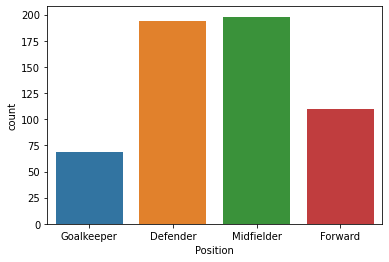

In [15]:
sns.countplot(x=y)

In [16]:
X = premier_df[['Name', 'Wins', 'Losses', 'Goals']]
X.head()

,Name,Wins,Losses,Goals
0,Bernd Leno,28,16,0
1,Matt Macey,0,0,0
2,Rúnar Alex Rúnarsson,0,0,0
3,Héctor Bellerín,90,37,7
4,Kieran Tierney,7,5,1


In [17]:
X.shape

(571, 4)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [19]:
y_test.head()

174    Goalkeeper
488       Forward
432       Forward
59     Goalkeeper
64       Defender
Name: Position, dtype: object

In [20]:
y_test.value_counts() / len(y_test) *100

Midfielder    34.965035
Defender      34.265734
Forward       18.881119
Goalkeeper    11.888112
Name: Position, dtype: float64

<AxesSubplot:xlabel='Position', ylabel='count'>

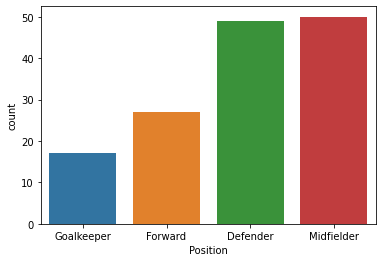

In [21]:
sns.countplot(x=y_test)

In [22]:
X_test.head()

,Name,Wins,Losses,Goals
174,João Virgínia,0,0,0
488,Son Heung-Min,95,36,57
432,Oliver McBurnie,17,25,6
59,Jason Steele,0,0,0
64,Lewis Dunk,28,49,6


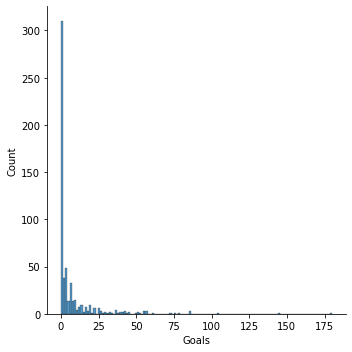

In [23]:
sns.displot(data=X['Goals'])

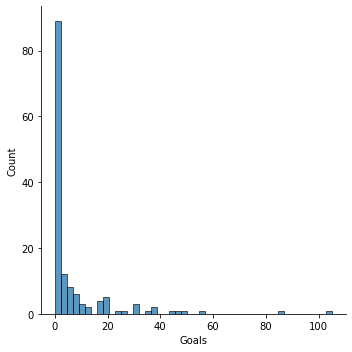

In [24]:
sns.displot(data=X_test['Goals'])

In [25]:
X_test[X_test['Goals'] == 0].Goals.count() / len(X_test) * 100 #el 42% dels jugadors no han fet cap gol

46.85314685314685

SMOTE

In [26]:
premier_df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [56]:
premier = premier_df[['Name', 'Position', 'Wins', 'Losses']].copy(deep=True)
premier

,Name,Position,Wins,Losses
0,Bernd Leno,Goalkeeper,28,16
1,Matt Macey,Goalkeeper,0,0
2,Rúnar Alex Rúnarsson,Goalkeeper,0,0
3,Héctor Bellerín,Defender,90,37
4,Kieran Tierney,Defender,7,5
...,...,...,...,...
566,Pedro Neto,Forward,14,7
567,Raúl Jiménez,Forward,32,23
568,Adama Traoré,Forward,27,47
569,Fábio Silva,Forward,0,1


In [57]:
premier['De_campo'] = [0 if x == 'Goalkeeper' else 1 for x in premier.Position]
premier.head()

,Name,Position,Wins,Losses,De_campo
0,Bernd Leno,Goalkeeper,28,16,0
1,Matt Macey,Goalkeeper,0,0,0
2,Rúnar Alex Rúnarsson,Goalkeeper,0,0,0
3,Héctor Bellerín,Defender,90,37,1
4,Kieran Tierney,Defender,7,5,1


In [58]:
premier.De_campo.value_counts()

1    502
0     69
Name: De_campo, dtype: int64

<AxesSubplot:xlabel='De_campo', ylabel='count'>

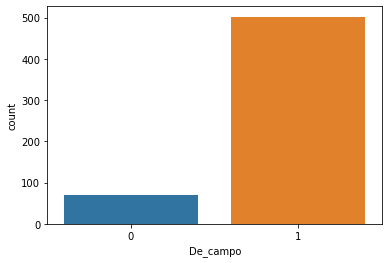

In [59]:
sns.countplot(data=premier, x='De_campo')

<AxesSubplot:xlabel='De_campo', ylabel='Wins'>

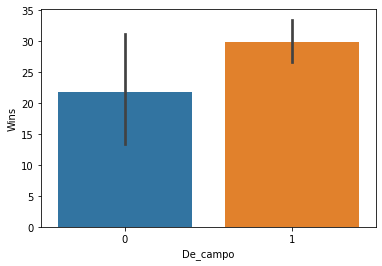

In [68]:
sns.barplot(data=premier, x='De_campo', y='Wins')

In [60]:
X = premier[['Wins', 'Losses']]
y = premier.De_campo

In [61]:
sm = SMOTE()

In [62]:
X_trained, y_trained = sm.fit_resample(X, y)

In [63]:
X_trained

,Wins,Losses
0,28,16
1,0,0
2,0,0
3,90,37
4,7,5
...,...,...
999,23,42
1000,0,0
1001,11,11
1002,0,0


In [64]:
y_trained

0       0
1       0
2       0
3       1
4       1
       ..
999     0
1000    0
1001    0
1002    0
1003    0
Name: De_campo, Length: 1004, dtype: int64

<AxesSubplot:xlabel='De_campo', ylabel='count'>

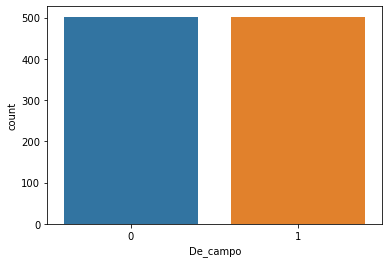

In [65]:
sns.countplot(x=y_trained)

<AxesSubplot:xlabel='De_campo', ylabel='Wins'>

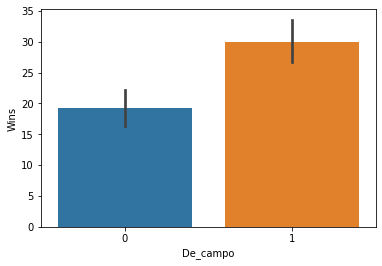

In [67]:
sns.barplot(x=y_trained, y=X_trained.Wins)

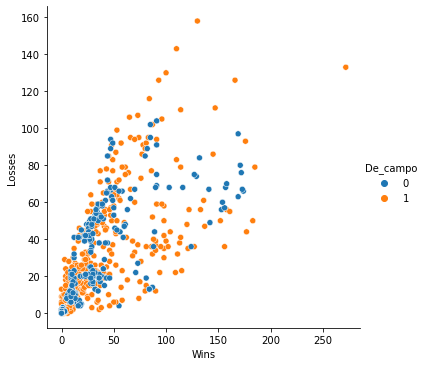

In [71]:
sns.relplot(x=X_trained.Wins, y=X_trained.Losses, hue=y_trained)

- Exercici 3
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

    def generator(max):
        number = 1
        while number < max:
            number += 1
            yield number
            
    # Create as stream generator
    stream = generator(10000)
    
    # Doing Reservoir Sampling from the stream
    k=5 #cómo de grande es el sample
    reservoir = []
    for i, element in enumerate(stream):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
    # Select item in stream and remove one of the k items already selected
                   reservoir[random.choice(range(0,k))] = element

So, let us think of a stream of only 3 items and we have to keep 2 of them.

We see the first item, we hold it in the list as our reservoir has space. We see the second item, we hold it in the list as our reservoir has space.

We see the third item. Here is where things get interesting. We choose the third item to be in the list with probability 2/3.

Let us now see the probability of first item getting selected:

The probability of removing the first item is the probability of element 3 getting selected multiplied by the probability of Element 1 getting randomly chosen as the replacement candidate from the 2 elements in the reservoir. That probability is:

2/3*1/2 = 1/3

Thus the probability of 1 getting selected is:

1–1/3 = 2/3

We can have the exact same argument for the Second Element and we can extend it for many elements.

Thus each item has the same probability of getting selected: 2/3 or in general k/n

https://thispointer.com/pandas-how-to-create-an-empty-dataframe-and-append-rows-columns-to-it-in-python/

In [88]:
#stream = premier
#size_sample: variable que ya teníamos desde antes (20% de la población)
reservoir = pd.DataFrame(columns=['Name', 'Position', 'Wins', 'Losses', 'De_campo'], index=range(0, size_sample))
reservoir.head()

,Name,Position,Wins,Losses,De_campo
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [89]:
reservoir.iloc[0, :] = premier.iloc[0, :]
reservoir.head()

,Name,Position,Wins,Losses,De_campo
0,Bernd Leno,Goalkeeper,28,16,0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
